In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.preprocessing import OneHotEncoder #for data preprocessing
from sklearn.preprocessing import StandardScaler #for scaling data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#for data preprocessing using keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#for building Deep CNN model
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.utils import plot_model
from keras.metrics import Accuracy 
import graphviz
import pydot

In [3]:
images = []
labels = []

for directory in os.listdir('./leapGestRecog/'):
    for subdir in os.listdir(os.path.join('./leapGestRecog/',directory)):
        for image in os.listdir(os.path.join('./leapGestRecog/',directory,subdir)):
            img_path = os.path.join('./leapGestRecog/',directory,subdir,image)
            images.append(img_path)
            labels.append(subdir)
print(labels)

['01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm'

In [4]:
df = pd.DataFrame({'Image':images, 'Label':labels})
df.head(10)

,Image,Label
0,./leapGestRecog/00\01_palm\frame_00_01_0001.png,01_palm
1,./leapGestRecog/00\01_palm\frame_00_01_0002.png,01_palm
2,./leapGestRecog/00\01_palm\frame_00_01_0003.png,01_palm
3,./leapGestRecog/00\01_palm\frame_00_01_0004.png,01_palm
4,./leapGestRecog/00\01_palm\frame_00_01_0005.png,01_palm
5,./leapGestRecog/00\01_palm\frame_00_01_0006.png,01_palm
6,./leapGestRecog/00\01_palm\frame_00_01_0007.png,01_palm
7,./leapGestRecog/00\01_palm\frame_00_01_0008.png,01_palm
8,./leapGestRecog/00\01_palm\frame_00_01_0009.png,01_palm
9,./leapGestRecog/00\01_palm\frame_00_01_0010.png,01_palm


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20110 entries, 0 to 20109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   20110 non-null  object
 1   Label   20110 non-null  object
dtypes: object(2)
memory usage: 314.3+ KB


In [6]:
df.describe()

,Image,Label
count,20110,20110
unique,20110,21
top,./leapGestRecog/00\01_palm\frame_00_01_0001.png,01_palm
freq,1,2000


In [7]:
df.tail()

,Image,Label
20105,./leapGestRecog/leapGestRecog\leapGestRecog\05,leapGestRecog
20106,./leapGestRecog/leapGestRecog\leapGestRecog\06,leapGestRecog
20107,./leapGestRecog/leapGestRecog\leapGestRecog\07,leapGestRecog
20108,./leapGestRecog/leapGestRecog\leapGestRecog\08,leapGestRecog
20109,./leapGestRecog/leapGestRecog\leapGestRecog\09,leapGestRecog


[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


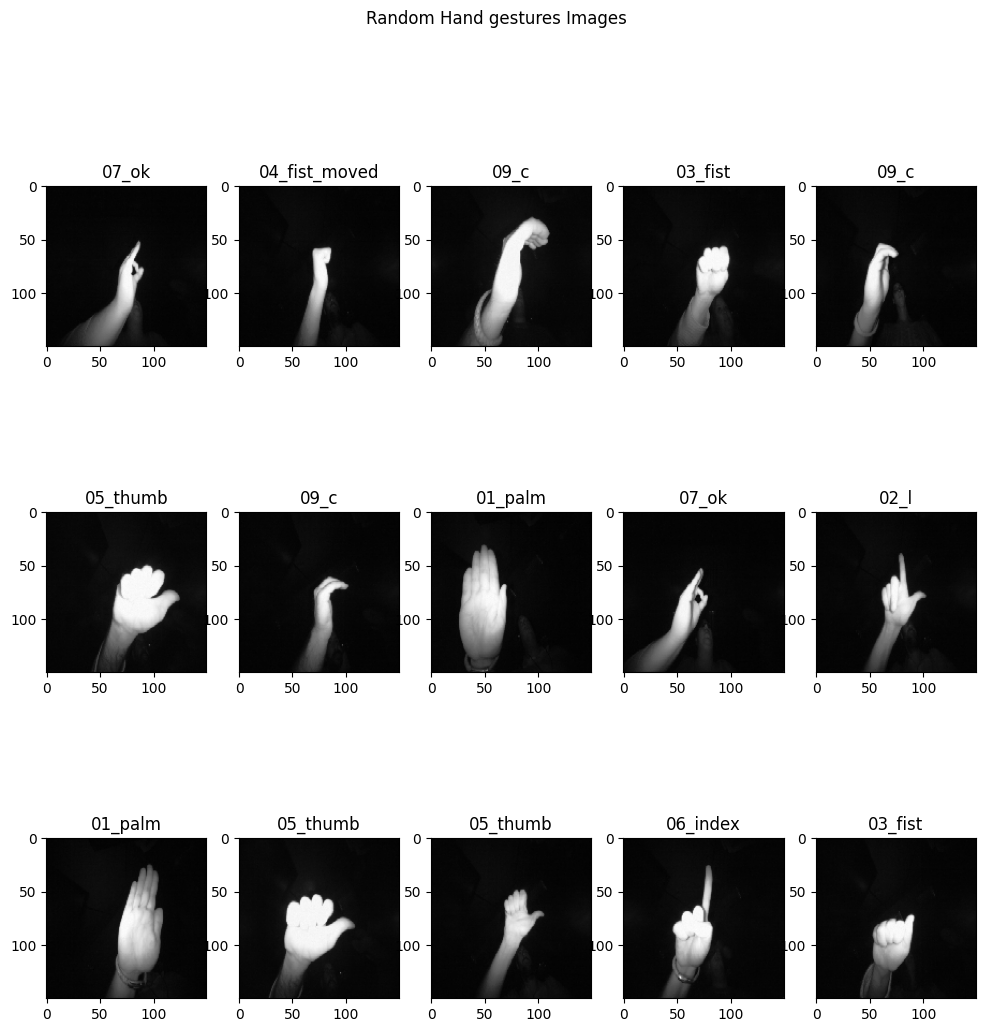

In [8]:
df_img = df['Image']
df_label = df['Label']

nrows = 3
ncols = 5
fig, axx = plt.subplots(nrows,ncols, figsize=(12,12))
fig.suptitle("Random Hand gestures Images")
print(axx)
for i in range(nrows):
    for j in range(ncols):
        n = np.random.randint(0,20099)
        img = load_img(df['Image'][n], target_size=(150,150))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img /= 255.0
        label = df_label[n]
        image = np.squeeze(img)
        axx[i][j].imshow(image)
        axx[i][j].set_title(label)
        
plt.show()
plt.close()

In [9]:
X_train, x = train_test_split(df, test_size=0.2)
x_valid, x_test = train_test_split(x,test_size=0.5)
X_train.info()
x_valid.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16088 entries, 4739 to 19596
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   16088 non-null  object
 1   Label   16088 non-null  object
dtypes: object(2)
memory usage: 377.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3854 to 16846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2011 non-null   object
 1   Label   2011 non-null   object
dtypes: object(2)
memory usage: 47.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 7271 to 13323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2011 non-null   object
 1   Label   2011 non-null   object
dtypes: object(2)
memory usage: 47.1+ KB


In [10]:
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            brightness_range=[0.2,1.2])


train_datagen = ImageDataGenerator(rescale=1/255.0,
                                    shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1/255.0)

In [11]:
b_size=1
train_generator = train_datagen.flow_from_dataframe(dataframe=X_train,
                                                   x_col="Image",y_col='Label',
                                                   class_mode="categorical",
                                                   target_size=(150,150),
                                                   batch_size=b_size,
                                                   seed=2020, shuffle=True)

valid_generator = validate_datagen.flow_from_dataframe(dataframe=x_valid,x_col='Image',
                                                      y_col='Label',
                                                      class_mode="categorical",
                                                      target_size=(150,150),
                                                      seed=2020,
                                                      batch_size=b_size,
                                                      shuffle=False)

Found 15993 validated image filenames belonging to 10 classes.


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 95 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


Found 2006 validated image filenames belonging to 10 classes.


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


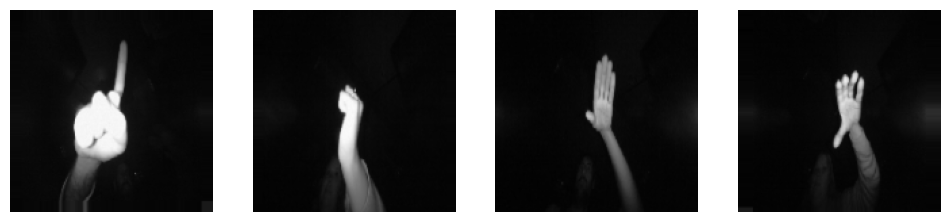

In [12]:
# plotting some augmented images
fig, axx = plt.subplots(nrows=1,ncols=4, figsize=(12,12))

for i in range(4):
    # convert into unsigned integers for plotting
    image = next(train_generator)[0].astype('float64')
    image = np.squeeze(image)
    axx[i].imshow(image)
    axx[i].axis('off')

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# On top of the model we add 2 fully connected layers to flatten 
# the 3D feature maps into 10 feature vectors representing 10 different
# categories of hand gestures

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer = 'adam',
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
history = model.fit(train_generator, steps_per_epoch=2000//b_size,
                   epochs = 20,
                   validation_data=valid_generator,
                   validation_steps=800//b_size)

model.save('handG_Rec.h5')

Epoch 1/20
2000/2000 [==============================] - 114s 56ms/step - loss: 1.5084 - categorical_accuracy: 0.4890 - val_loss: 0.5994 - val_categorical_accuracy: 0.8363
Epoch 2/20
2000/2000 [==============================] - 102s 51ms/step - loss: 0.5324 - categorical_accuracy: 0.8300 - val_loss: 0.3091 - val_categorical_accuracy: 0.9112
Epoch 3/20
2000/2000 [==============================] - 123s 61ms/step - loss: 0.3249 - categorical_accuracy: 0.9000 - val_loss: 0.1569 - val_categorical_accuracy: 0.9513
Epoch 4/20
2000/2000 [==============================] - 127s 63ms/step - loss: 0.2489 - categorical_accuracy: 0.9215 - val_loss: 0.0970 - val_categorical_accuracy: 0.9575
Epoch 5/20
2000/2000 [==============================] - 110s 55ms/step - loss: 0.2366 - categorical_accuracy: 0.9250 - val_loss: 0.0527 - val_categorical_accuracy: 0.9825
Epoch 6/20
2000/2000 [==============================] - 111s 55ms/step - loss: 0.1751 - categorical_accuracy: 0.9380 - val_loss: 0.0393 - val_cat

In [ ]:
history.history

In [ ]:
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['loss'],
mode='lines',
name=f'training loss',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_loss'],
                         mode='lines',
                         name=f'Validation loss',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training loss",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")
                  
fig.update_layout({'plot_bgcolor': '#f2f8fd' , 
                   'paper_bgcolor': 'white',}, 
                   template='plotly_white')

In [ ]:
# visualize training accuracy and validation accuracy
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
                        y = history.history['categorical_accuracy'],
                        mode='lines',
                        name=f'Training accuracy',
                        marker_size=3,
                        line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
                        y = history.history['val_categorical_accuracy'],
                        mode='lines',
                        name=f'Validation accuracy',
                        marker_size=3,
                        line_color='grey'))
fig.update_layout(title="CNN Training accuracy",
                 xaxis_title='Epochs',
                  yaxis_title=f"CategoricalCrossentropy")

fig.update_layout({'plot_bgcolor':'#f2f9fd',
                  'paper_bgcolor':'white',},
                 template = 'plotly_white')

In [ ]:
x_test.info()
x_test.tail(20)
samples = x_test.sample(n=5)

In [ ]:
model = load_model('./handG_Rec.h5',compile=True)